In [1]:
import os
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import phik
sns.set(rc={'figure.figsize' : (16,6)}, style = 'ticks')

## Описание датасета:
Датасет содержит информацию о среднемесячной номинальной начисленной заработной плате работников организаций в Российской Федерации с **2000** по **2023** годы по различным отраслям экономики по данным [Росстата](https://rosstat.gov.ru/labor_market_employment_salaries).

Каждая строка представляет год и значения заработной платы для трех отраслей: строительство, образование и деятельность в области здравоохранения и социальных услуг.

Данные также включают годовую инфляцию, уровень безработицы и номинальный ВВП на душу населения России в долларах США.

### Параметры датасета:

- **year**: год отчетности.
- **construction**: среднемесячная номинальная начисленная заработная плата в сфере строительства.
- **education**: среднемесячная номинальная начисленная заработная плата в сфере образования.
- **healthcare_and_social_services**: среднемесячная номинальная начисленная заработная плата в сфере здравоохранения и социальных услуг.
- **annual_inflation**: годовая инфляция в процентах. Данные о годовой инфляции доступны [здесь](https://rosstat.gov.ru/labor_market_employment_salaries).
- **unemployment_rate**: уровень безработицы в процентах.
- **gdp_per_capita**: номинальный ВВП на душу населения России в долларах США.


In [2]:
# Подключение к базе данных
USERNAME = "russian_economy_db_owner"
with open('pass.txt') as file:
    PASSWORD = file.read().strip()


HOST = "ep-restless-dust-a2uu19hg.eu-central-1.aws.neon.tech"
DATABASE = "russian_economy_db"
conn_str = f'postgresql://{USERNAME}:{PASSWORD}@{HOST}/{DATABASE}?sslmode=require'

engine = create_engine(conn_str)

In [3]:
query = "SELECT * FROM russian_economy"
data = pd.read_sql(query, engine)

In [4]:
data.head(24)

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita
0,2000,2640,1240,1333,20.20,10.6,1902.0
1,2001,3859,1833,1960,18.58,9.0,2255.0
2,2002,4807,2927,3141,15.06,7.9,2553.0
3,2003,6177,3387,3663,11.99,8.2,3198.0
4,2004,7305,4203,4612,11.74,7.8,4404.0
5,2005,9043,5430,5906,10.91,7.1,5709.0
6,2006,10869,6983,8060,9.00,7.1,7426.0
7,2007,14333,8778,10037,11.87,6.0,9761.0
8,2008,18574,11317,13049,13.28,6.3,12464.0
9,2009,18122,13294,14820,8.80,8.4,9157.0


## Исследование данных

Размер датасета

In [5]:
data.shape

(24, 7)

Информация о типах данных и пропусках

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            24 non-null     int64  
 1   construction                    24 non-null     int64  
 2   education                       24 non-null     int64  
 3   healthcare_and_social_services  24 non-null     int64  
 4   annual_inflation                24 non-null     float64
 5   unemployment_rate               24 non-null     float64
 6   gdp_per_capita                  24 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 1.4 KB


Основные числовые характеристики

In [7]:
data.describe()

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2011.500000,26132.625000,20829.791667,23424.000000,9.644583,6.325000,9748.375000
std,7.071068,18262.136133,15930.824439,18440.444951,4.536459,1.730104,4429.950366
min,2000.000000,2640.000000,1240.000000,1333.000000,2.520000,3.200000,1902.000000
25%,2005.750000,10412.500000,6594.750000,7521.500000,6.362500,5.200000,6996.750000
50%,2011.500000,24816.500000,17402.000000,19093.000000,8.900000,5.900000,10452.500000
75%,2017.250000,34888.000000,31283.750000,33991.750000,11.937500,7.425000,12965.500000
max,2023.000000,68944.000000,54263.000000,61486.000000,20.200000,10.600000,15929.000000


### Динамика номинальных и реальных заработных плат в период с 2000 по 2023 годы по отраслям

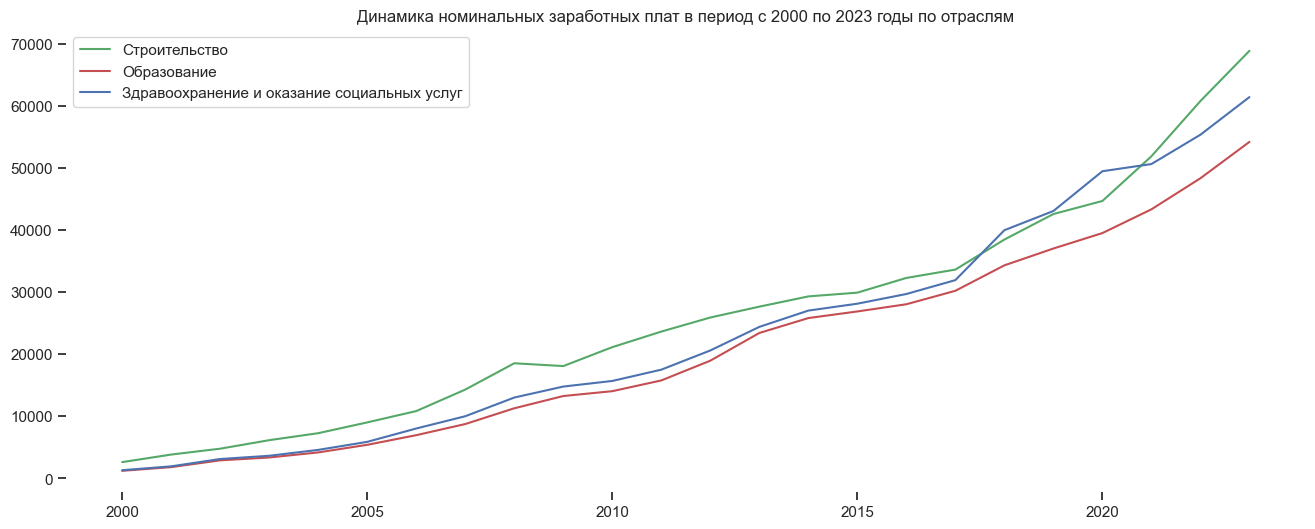

In [8]:
plt.plot(data['year'], data['construction'], 'g', label='Строительство')
plt.plot(data['year'], data['education'],'r',label='Образование')
plt.plot(data['year'], data['healthcare_and_social_services'], 'b', label='Здравоохранение и оказание социальных услуг')
plt.legend(loc='best')
plt.title(f'Динамика номинальных заработных плат в период с 2000 по 2023 годы по отраслям')
plt.box(False)
plt.show()

### Выводы:

1. **Строительство**:
   - Заработная плата в отрасли строительства значительно увеличилась с течением времени. Начиная с относительно низких значений в 2000 году, она постепенно росла, с более заметным ускорением роста после 2006 года. Видно, что к концу периода (2023 год) она значительно выросла по сравнению с началом периода (2000 год).

2. **Образование**:
   - Заработная плата в сфере образования также демонстрирует постепенный рост за рассматриваемый период. Она начала расти с 2000 года и также ускорила темп роста после 2006 года. К концу периода она также заметно увеличилась.

3. **Здравоохранение и социальные услуги**:
   - Заработная плата в сфере здравоохранения и социальных услуг также растет с 2000 года, однако ее темп роста может быть несколько медленнее, чем в других отраслях. Важно отметить, что к 2023 году она также значительно выросла, хотя, возможно, в ней наблюдается менее выраженный тренд роста по сравнению с отраслями строительства и образования.

В целом, все три отрасли демонстрируют положительный тренд роста номинальных заработных плат с течением времени. Однако темпы роста могут быть различными в зависимости от конкретной отрасли, с некоторыми колебаниями в течение расго периода.сматриваемо

In [9]:
# Средние зарплаты с учетом уровня инфляции 
data['construction_real'] = data['construction'] / (1 + data['annual_inflation'] / 100)
data['education_real'] = data['education'] / (1 + data['annual_inflation'] / 100)
data['healthcare_and_social_services_real'] = data['healthcare_and_social_services']  / (1 + data['annual_inflation'] / 100)
data.head()

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita,construction_real,education_real,healthcare_and_social_services_real
0,2000,2640,1240,1333,20.20,10.6,1902.0,2196.339434,1031.613977,1108.985025
1,2001,3859,1833,1960,18.58,9.0,2255.0,3254.343060,1545.791870,1652.892562
2,2002,4807,2927,3141,15.06,7.9,2553.0,4177.820268,2543.890144,2729.880063
3,2003,6177,3387,3663,11.99,8.2,3198.0,5515.671042,3024.377177,3270.827752
4,2004,7305,4203,4612,11.74,7.8,4404.0,6537.497763,3761.410417,4127.438697


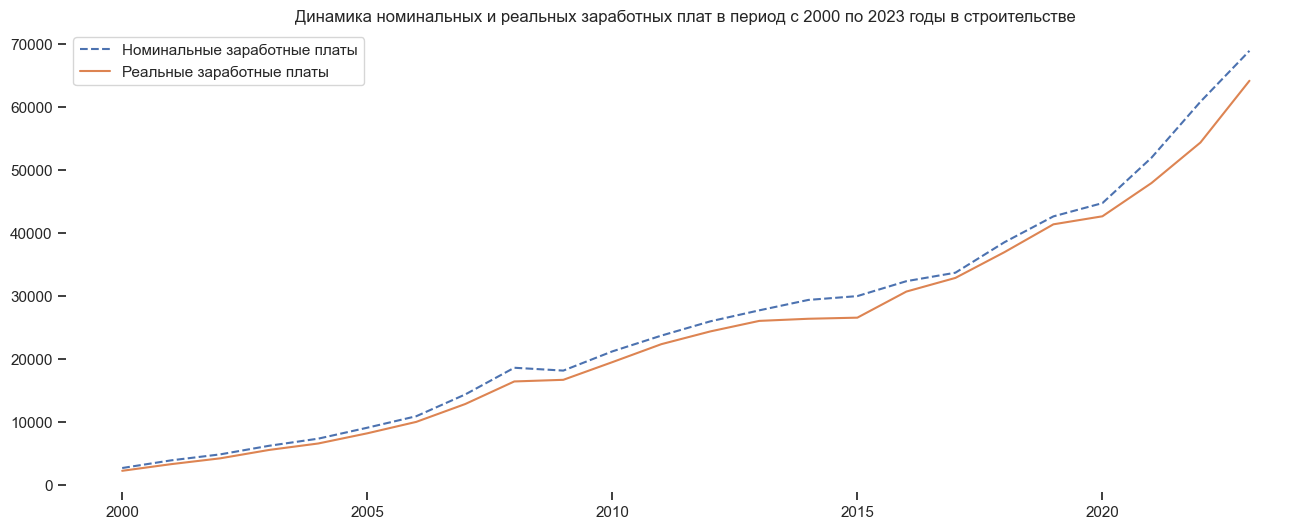

In [10]:
plt.plot(data['year'], data['construction'], '--', label='Номинальные заработные платы')
plt.plot(data['year'], data['construction_real'], label='Реальные заработные платы')
plt.legend(loc='best')
plt.title(f'Динамика номинальных и реальных заработных плат в период с 2000 по 2023 годы в строительстве')
plt.box(False)
plt.show()

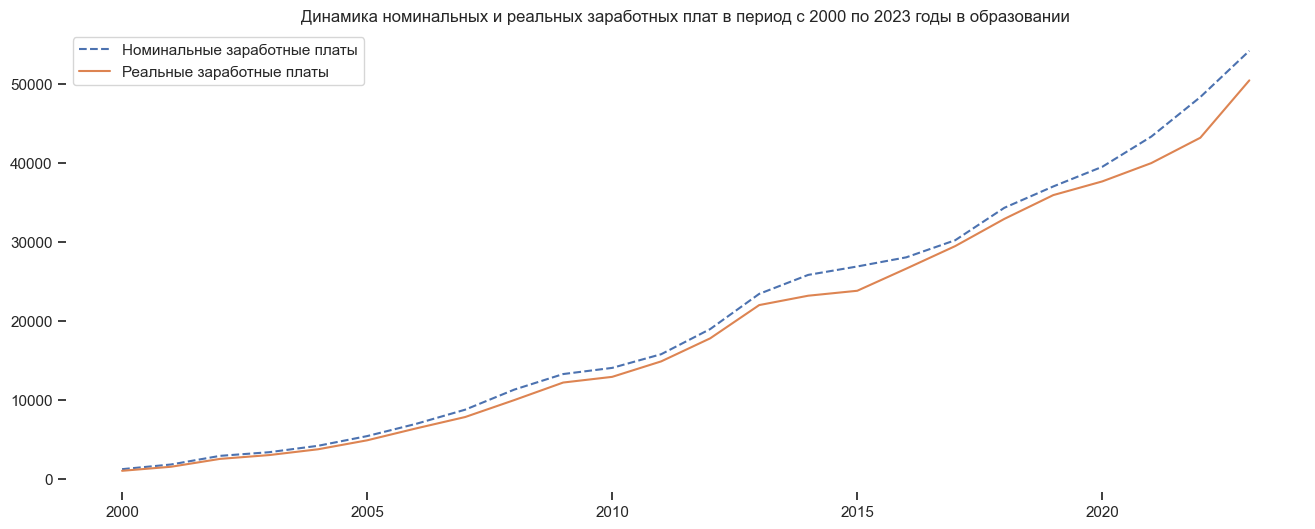

In [11]:
plt.plot(data['year'], data['education'],'--',label='Номинальные заработные платы')
plt.plot(data['year'], data['education_real'], label='Реальные заработные платы')
plt.legend(loc='best')
plt.title(f'Динамика номинальных и реальных заработных плат в период с 2000 по 2023 годы в образовании')
plt.box(False)
plt.show()

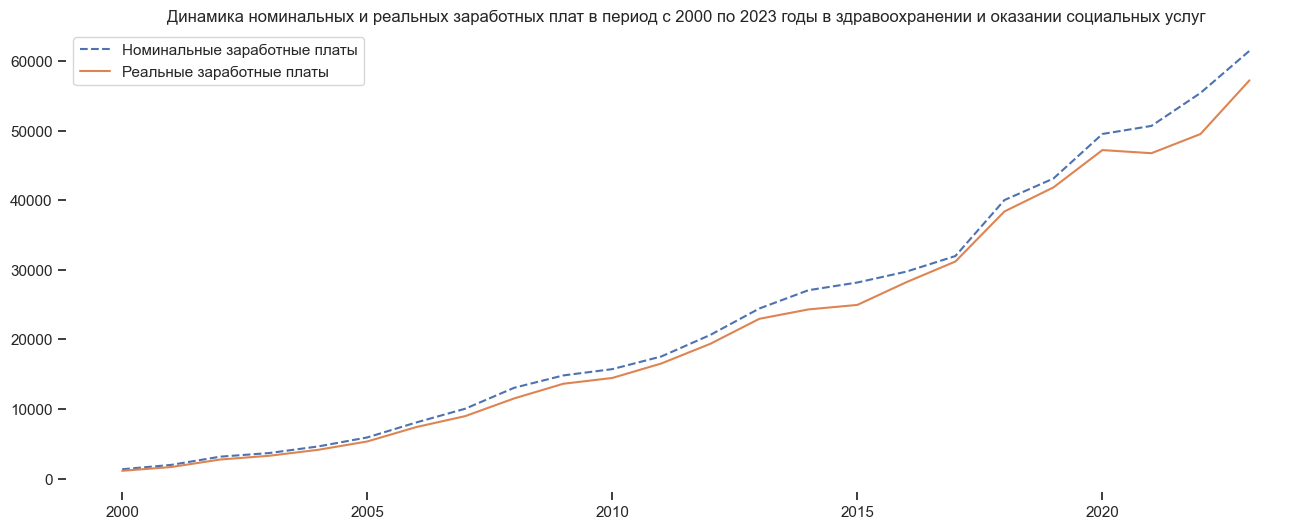

In [12]:
plt.plot(data['year'], data['healthcare_and_social_services'], '--', label='Номинальные заработные платы')
plt.plot(data['year'], data['healthcare_and_social_services_real'], label='Реальные заработные платы')
plt.legend(loc='best')
plt.title(f'Динамика номинальных и реальных заработных плат в период с 2000 по 2023 годы в здравоохранении и оказании социальных услуг')
plt.box(False)
plt.show()

### Влияние инфляции на изменение заработных плат по сравнению с предыдущим годом

In [13]:
prev_year = data[['construction_real', 'education_real', 'healthcare_and_social_services_real']].shift(1).rename(columns={
    'construction_real': 'construction_real_prev', 
    'education_real': 'education_real_prev', 
    'healthcare_and_social_services_real': 'healthcare_and_social_services_real_prev'
})

prev_year.head(3)

,construction_real_prev,education_real_prev,healthcare_and_social_services_real_prev
0,NaN,NaN,NaN
1,2196.339434,1031.613977,1108.985025
2,3254.343060,1545.791870,1652.892562


In [14]:
df = pd.concat([data, prev_year], axis=1)
df['construction_growth'] = (df['construction_real'] / df['construction_real_prev'] - 1) * 100
df['education_growth'] = (df['education_real'] / df['education_real_prev'] - 1) * 100
df['healthcare_and_social_services_growth'] = (df['healthcare_and_social_services_real'] / df['healthcare_and_social_services_real_prev'] - 1) * 100
df.head()

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita,construction_real,education_real,healthcare_and_social_services_real,construction_real_prev,education_real_prev,healthcare_and_social_services_real_prev,construction_growth,education_growth,healthcare_and_social_services_growth
0,2000,2640,1240,1333,20.20,10.6,1902.0,2196.339434,1031.613977,1108.985025,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,3859,1833,1960,18.58,9.0,2255.0,3254.343060,1545.791870,1652.892562,2196.339434,1031.613977,1108.985025,48.171226,49.842083,49.045526
2,2002,4807,2927,3141,15.06,7.9,2553.0,4177.820268,2543.890144,2729.880063,3254.343060,1545.791870,1652.892562,28.376763,64.568736,65.157744
3,2003,6177,3387,3663,11.99,8.2,3198.0,5515.671042,3024.377177,3270.827752,4177.820268,2543.890144,2729.880063,32.022698,18.887885,19.815804
4,2004,7305,4203,4612,11.74,7.8,4404.0,6537.497763,3761.410417,4127.438697,5515.671042,3024.377177,3270.827752,18.525882,24.369753,26.189424


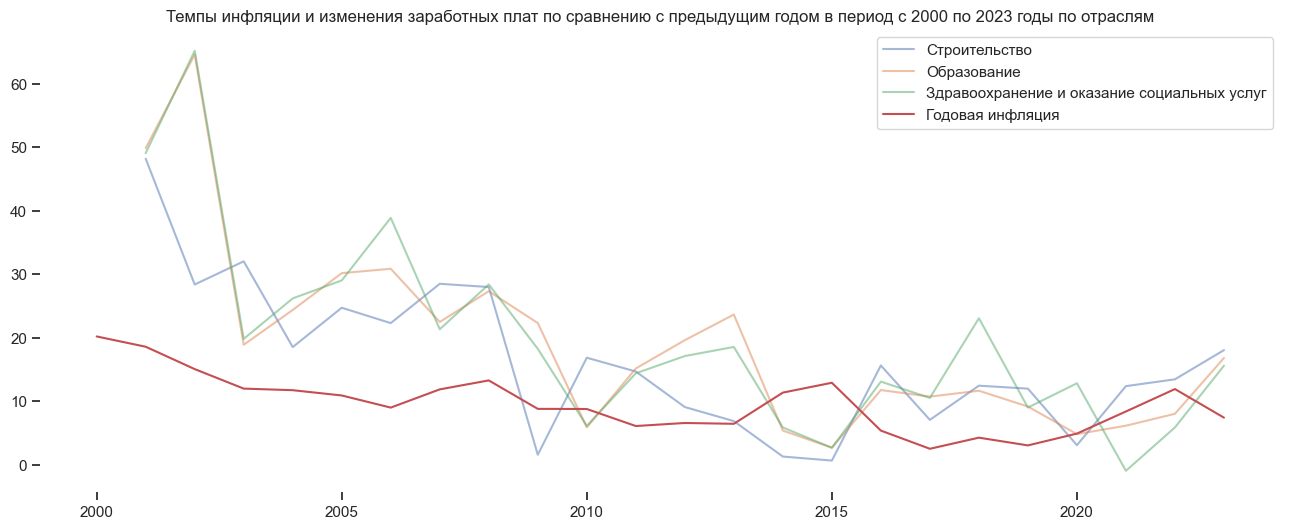

In [15]:
plt.plot(df['year'], df['construction_growth'], label='Строительство', alpha=0.5)
plt.plot(df['year'], df['education_growth'],label='Образование', alpha=0.5)
plt.plot(df['year'], df['healthcare_and_social_services_growth'], label='Здравоохранение и оказание социальных услуг', alpha=0.5)
plt.plot(df['year'], df['annual_inflation'], label='Годовая инфляция')
plt.legend(loc='best')
plt.title(f'Темпы инфляции и изменения заработных плат по сравнению с предыдущим годом в период с 2000 по 2023 годы по отраслям')
plt.box(False)
plt.show()

### Выводы:

В обычные годы изменения в заработной плате в разных отраслях обычно превышают темпы инфляции, что отражает повышение доходов работников относительно уровня цен на товары и услуги. 

Тем не менее, в некоторые периоды, такие как 2008 и 2014 годы, наблюдаются "кризисные" ситуации, когда эта тенденция нарушается из-за экономических факторов или финансовых кризисов. 

Эти периоды могут характеризоваться замедлением роста зарплат или даже их снижением относительно уровня инфляции.

## Взаимозависимость в данных

### Корреляция

**Корреляция Пирсона**

In [16]:
corr = data.corr(numeric_only=True)
corr

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita,construction_real,education_real,healthcare_and_social_services_real
year,1.000000,0.969107,0.981058,0.974885,-0.693664,-0.902000,0.761419,0.973568,0.982510,0.975632
construction,0.969107,1.000000,0.991737,0.989748,-0.563240,-0.877016,0.727847,0.998713,0.988057,0.985364
education,0.981058,0.991737,1.000000,0.996805,-0.584777,-0.872601,0.695070,0.993257,0.998820,0.994967
healthcare_and_social_services,0.974885,0.989748,0.996805,1.000000,-0.579634,-0.855708,0.675484,0.991877,0.996348,0.998893
annual_inflation,-0.693664,-0.563240,-0.584777,-0.579634,1.000000,0.660882,-0.611886,-0.594295,-0.612249,-0.605635
unemployment_rate,-0.902000,-0.877016,-0.872601,-0.855708,0.660882,1.000000,-0.803411,-0.877481,-0.870697,-0.853161
gdp_per_capita,0.761419,0.727847,0.695070,0.675484,-0.611886,-0.803411,1.000000,0.724298,0.689426,0.669308
construction_real,0.973568,0.998713,0.993257,0.991877,-0.594295,-0.877481,0.724298,1.000000,0.992028,0.989868
education_real,0.982510,0.988057,0.998820,0.996348,-0.612249,-0.870697,0.689426,0.992028,1.000000,0.996793
healthcare_and_social_services_real,0.975632,0.985364,0.994967,0.998893,-0.605635,-0.853161,0.669308,0.989868,0.996793,1.000000


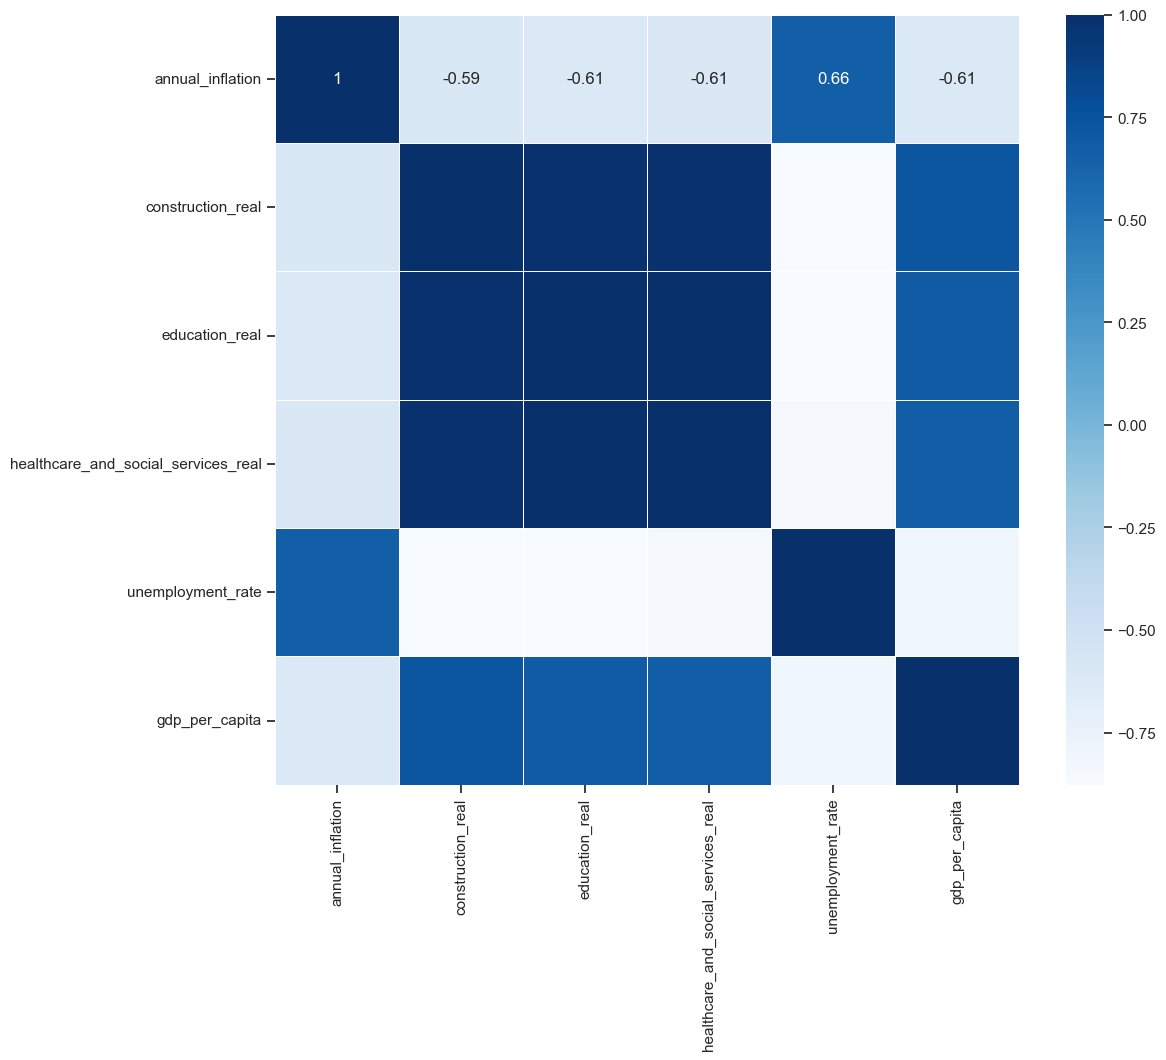

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(data[['annual_inflation', 'construction_real',
       'education_real', 'healthcare_and_social_services_real', 'unemployment_rate', 'gdp_per_capita']].corr(), annot=True, linewidth=.5, cmap='Blues')
plt.show()

**Корреляция Спирмена**

In [18]:
corr = data.corr(method='spearman', numeric_only=True)
corr

,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita,construction_real,education_real,healthcare_and_social_services_real
year,1.000000,0.999130,1.000000,1.000000,-0.664348,-0.910517,0.721739,1.000000,1.000000,0.999130
construction,0.999130,1.000000,0.999130,0.999130,-0.656522,-0.917484,0.728696,0.999130,0.999130,0.998261
education,1.000000,0.999130,1.000000,1.000000,-0.664348,-0.910517,0.721739,1.000000,1.000000,0.999130
healthcare_and_social_services,1.000000,0.999130,1.000000,1.000000,-0.664348,-0.910517,0.721739,1.000000,1.000000,0.999130
annual_inflation,-0.664348,-0.656522,-0.664348,-0.664348,1.000000,0.585239,-0.486087,-0.664348,-0.664348,-0.669565
unemployment_rate,-0.910517,-0.917484,-0.910517,-0.910517,0.585239,1.000000,-0.758111,-0.910517,-0.910517,-0.903985
gdp_per_capita,0.721739,0.728696,0.721739,0.721739,-0.486087,-0.758111,1.000000,0.721739,0.721739,0.716522
construction_real,1.000000,0.999130,1.000000,1.000000,-0.664348,-0.910517,0.721739,1.000000,1.000000,0.999130
education_real,1.000000,0.999130,1.000000,1.000000,-0.664348,-0.910517,0.721739,1.000000,1.000000,0.999130
healthcare_and_social_services_real,0.999130,0.998261,0.999130,0.999130,-0.669565,-0.903985,0.716522,0.999130,0.999130,1.000000


## $\phi_k$

In [19]:
import phik

ph = data.phik_matrix()
ph

interval columns not set, guessing: ['year', 'construction', 'education', 'healthcare_and_social_services', 'annual_inflation', 'unemployment_rate', 'gdp_per_capita', 'construction_real', 'education_real', 'healthcare_and_social_services_real']


,year,construction,education,healthcare_and_social_services,annual_inflation,unemployment_rate,gdp_per_capita,construction_real,education_real,healthcare_and_social_services_real
year,1.000000,0.928994,0.856774,0.885938,0.706034,0.773785,0.868735,0.884586,0.900132,0.957837
construction,0.928994,1.000000,0.969486,0.908518,0.405141,0.536985,0.589787,0.998743,0.981177,0.975222
education,0.856774,0.969486,1.000000,0.963643,0.296954,0.296954,0.610591,0.980744,0.998864,0.984205
healthcare_and_social_services,0.885938,0.908518,0.963643,1.000000,0.696276,0.563248,0.588819,0.882579,0.941923,1.000000
annual_inflation,0.706034,0.405141,0.296954,0.696276,1.000000,0.771882,0.782525,0.253686,0.000000,0.315784
unemployment_rate,0.773785,0.536985,0.296954,0.563248,0.771882,1.000000,0.349396,0.444252,0.000000,0.600119
gdp_per_capita,0.868735,0.589787,0.610591,0.588819,0.782525,0.349396,1.000000,0.704337,0.000000,0.442016
construction_real,0.884586,0.998743,0.980744,0.882579,0.253686,0.444252,0.704337,1.000000,0.988920,0.964863
education_real,0.900132,0.981177,0.998864,0.941923,0.000000,0.000000,0.000000,0.988920,1.000000,0.986017
healthcare_and_social_services_real,0.957837,0.975222,0.984205,1.000000,0.315784,0.600119,0.442016,0.964863,0.986017,1.000000


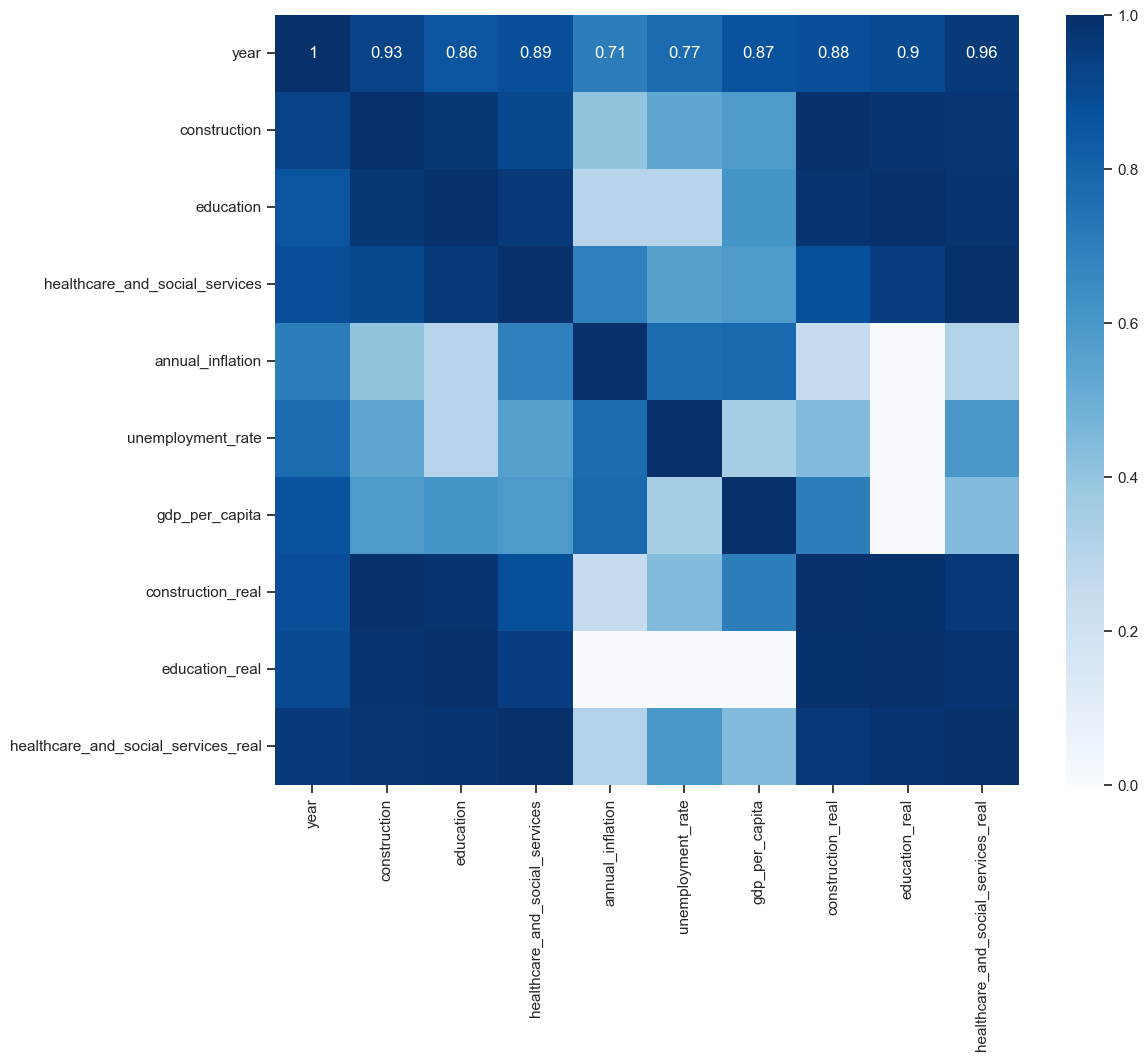

In [21]:
plt.figure(figsize=(12, 10))
sns.heatmap(ph, cmap="Blues", annot=True)
plt.show()

### Выводы:
Существует тесная связь между реальными зарплатами в России и уровнем ВВП на душу населения, что подчеркивает значимость экономического роста для увеличения доходов работников. 

Это свидетельствует о том, что повышение уровня производства и доходов на душу населения способствует увеличению заработной платы. 

С другой стороны, отмечается обратно пропорциональная зависимость между уровнем безработицы и реальными заработными платами. 

Высокий уровень безработицы обычно сопровождается снижением спроса на рабочую силу, что часто приводит к снижению зарплат. 

Этот феномен также подтверждается идеей Кривой Филлипса, который описывает обратную зависимость между уровнем инфляции и безработицы.